<a href="https://colab.research.google.com/github/SH22Hwang/GNU_AugumentedIntelligenceLab/blob/main/eunsun/chap09lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(109, 120, 4)

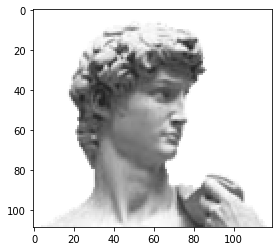

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

url = "https://github.com/dknife/ML/raw/main/data/image/david.png"
img = mpimg.imread(url)

plt.imshow(img)
img.shape

In [2]:
def padding(image, p_size):
  padded_img = np.pad(
      array = image,
      pad_width = ((p_size,p_size),(p_size,p_size),(0,0)),
      mode = 'constant', constant_values = 0)
  return padded_img


(113, 124, 4)

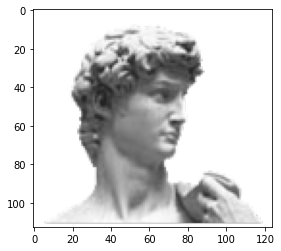

In [3]:
padded = padding(img,2)
plt.imshow(padded)
padded.shape

In [4]:
box_filter = np.array(
    [[1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9]])

def apply_filter(small_regin,filter):
  conv = np.multiply(small_regin, filter)
  return np.sum(conv)

In [5]:
def convolution(img, filter):
  r, c, channels = img.shape
  rp,cp = filter.shape
  th_r, th_c = (rp-1)//2, (cp-1)//2

  start = np.array([ th_r, th_c ])
  end = np.array([r,c]) - start
  conv_img = np.zeros((r - th_r*2, c - th_c*2, channels))

  for channel in range(channels):
    for i in range(start[0], end[0]):
      for j in range(start[1],end[1]):
        conv_img[i-th_r, j-th_c, channel] = apply_filter(
            img[i-th_r:i+th_r+1, j-th_c:j+th_c+1, channel],
            filter)
  return conv_img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


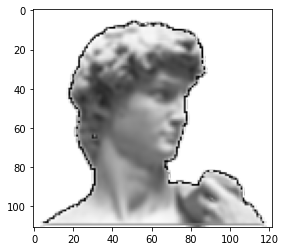

In [7]:
conv_img = convolution(padded, box_filter)
plt.imshow(conv_img)

laplacian = np.array(
    [[1,0,1],
     [0,-4,0],
     [1,0,1]])

conv_img = convolution(padded, laplacian)
plt.imshow(conv_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


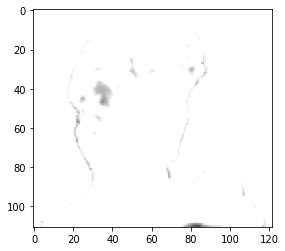

In [8]:
unknown = np.random.rand(3,3)

conv_img = convolution(padded, unknown)

np.clip(conv_img,0,255)
plt.imshow(conv_img)

In [9]:
import tensorflow as tf
from tensorflow import  keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels)
print(test_images.shape)

train_images = train_images[:, :, :, np.newaxis]
test_images = test_images[:, :, :, np.newaxis]

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
[9 0 0 ... 3 0 5]
(10000, 28, 28)


In [10]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(input_shape = (28, 28, 1),
                                                     kernel_size = (3,3), padding='same',filters=32),
                                 keras.layers.MaxPooling2D((2,2), strides=2),
                                 keras.layers.Conv2D(kernel_size = (3,3), padding='same',
                                                     filters=64),
                                 keras.layers.MaxPooling2D((2,2), strides=2),
                                 keras.layers.Conv2D(kernel_size = (3,3), padding='same',
                                                     filters=32),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.Dense(32, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [12]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, 
                    epochs=15, validation_split=0.25)

Epoch 1/15
1407/1407 [==============================] - 69s 48ms/step - loss: 0.6872 - accuracy: 0.8153 - val_loss: 0.3975 - val_accuracy: 0.8584
Epoch 2/15
1407/1407 [==============================] - 68s 48ms/step - loss: 0.3457 - accuracy: 0.8775 - val_loss: 0.3950 - val_accuracy: 0.8611
Epoch 3/15
1407/1407 [==============================] - 68s 48ms/step - loss: 0.3001 - accuracy: 0.8928 - val_loss: 0.3575 - val_accuracy: 0.8792
Epoch 4/15
1407/1407 [==============================] - 68s 49ms/step - loss: 0.2953 - accuracy: 0.8939 - val_loss: 0.3640 - val_accuracy: 0.8597
Epoch 5/15
1407/1407 [==============================] - 69s 49ms/step - loss: 0.2721 - accuracy: 0.9020 - val_loss: 0.3033 - val_accuracy: 0.8941
Epoch 6/15
1407/1407 [==============================] - 71s 50ms/step - loss: 0.2603 - accuracy: 0.9071 - val_loss: 0.3668 - val_accuracy: 0.8843
Epoch 7/15
1407/1407 [==============================] - 71s 50ms/step - loss: 0.2376 - accuracy: 0.9145 - val_loss: 0.3417 -

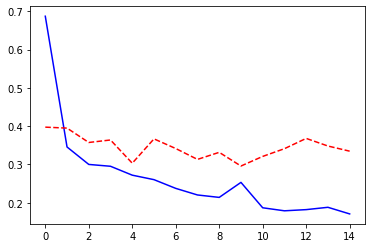

In [13]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r--')

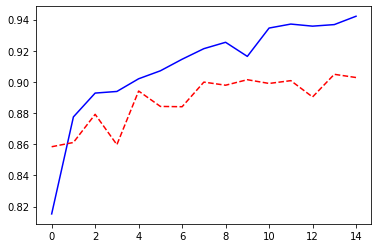

In [14]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r--')

In [15]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2 )
print("테스트 정확도:",test_acc)

313/313 - 4s - loss: 0.3519 - accuracy: 0.8994
테스트 정확도: 0.899399995803833


In [16]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [17]:
randIdx = np.random.randint(0,1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images),axis=1)
print(predictions)

[6 5 0 9 9 8 8 3 3 2 4 6 6 3 2 3 5 4 9 3 2 7 7 6 3]


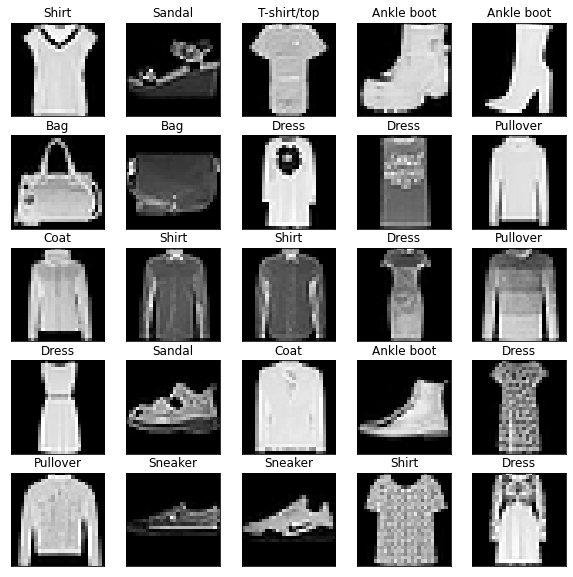

In [18]:
def plot_images(images,labels,images_per_row=5):
  n_images = len(images)
  n_rows = (n_images-1) // images_per_row + 1
  fig, ax = plt.subplots(n_rows, images_per_row, figsize = (images_per_row * 2, n_rows * 2))

  for i in range(n_rows):
    for j in range(images_per_row):
      if i*images_per_row + j >= n_images: break
      img_idx = i*images_per_row + j
      a_image = images[img_idx].reshape(28,28)

      if n_rows>1: axis = ax[i,j]
      else: axis = ax[j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      label = class_name[labels[img_idx]]
      axis.set_title(label)
      axis.imshow(a_image, cmap='gray', interpolation='nearest')

plot_images(images, predictions, images_per_row = 5)

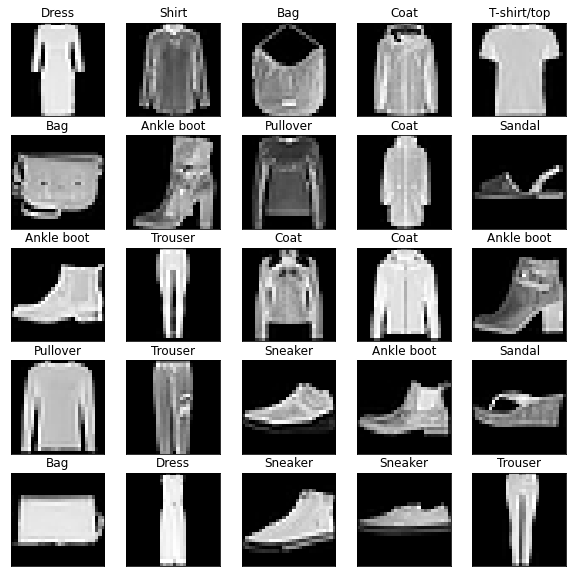

In [19]:
randIdx = np.random.randint(0,1000)

images = test_images[randIdx:randIdx+25]
predictions = np.argmax(model.predict(images), axis=1)
plot_images(images, predictions, images_per_row = 5)

In [20]:
from skimage.transform import resize
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras import models, layers
from keras.models import Model, load_model
import pandas as pd
from keras import optimizers

In [21]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

x_train, x_test = x_train[:10000] / 255.0, x_test[:2000] / 255.0
y_train, y_test = y_train[:10000], y_test[:2000]

11501568/11490434 [==============================] - 0s 0us/step


In [22]:
x_train_preprocess = np.zeros((x_train.shape[0], 75, 75, 3),
                              dtype = np.float32)
print(x_train_preprocess.shape)

for i, img in enumerate(x_train):
  img_resize = resize(img, (75,75), anti_aliasing=True)
  x_train_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

(10000, 75, 75, 3)


In [23]:
x_test_preprocess = np.zeros((x_test.shape[0], 75, 75, 3),
                              dtype = np.float32)
print(x_test_preprocess.shape)

for i, img in enumerate(x_test):
  img_resize = resize(img, (75,75), anti_aliasing=True)
  x_test_preprocess[i] = np.dstack([img_resize, img_resize, img_resize])

(2000, 75, 75, 3)


In [24]:
pre_trained_model = InceptionV3(input_shape=(75,75,3),
                                include_top=False,
                                weights=None)
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d_3[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [25]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(10, activation='sigmoid')(x)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model = Model(pre_trained_model.input, x)
model.compile(optimizer=RMSprop(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train_preprocess, y_train, epochs=20, validation_data=(x_test_preprocess,y_test))

acc=hist.history['accuracy']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
313/313 [==============================] - 502s 2s/step - loss: 1.4558 - accuracy: 0.7604 - val_loss: 4.2093 - val_accuracy: 0.2745
Epoch 2/20
313/313 [==============================] - 487s 2s/step - loss: 0.3077 - accuracy: 0.9275 - val_loss: 1.8267 - val_accuracy: 0.7480
Epoch 3/20
313/313 [==============================] - 488s 2s/step - loss: 0.2088 - accuracy: 0.9525 - val_loss: 28.3608 - val_accuracy: 0.2060
Epoch 4/20
313/313 [==============================] - 486s 2s/step - loss: 0.1621 - accuracy: 0.9675 - val_loss: 1.6640 - val_accuracy: 0.8730
Epoch 5/20
313/313 [==============================] - 490s 2s/step - loss: 0.1247 - accuracy: 0.9742 - val_loss: 0.2604 - val_accuracy: 0.9550
Epoch 6/20
163/313 [==============>...............] - ETA: 3:48 - loss: 0.1168 - accuracy: 0.9762